**Laboratorio de Métodos Cuantitativos Aplicados a la Gestión**

---

Clase integradora 1.1

In [15]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

❤

#Integrales
 Hallar la cantidad producida que maximiza el beneficio y el correspondiente beneficio total si $IMg(x)=20-2x$ y $CMg(x)=4+(x-4)^2$, suponiendo que $CF=10$. Graficar la función de beneficio total, y el beneficio total acumulado entre $x=10$ y $x=15$

In [16]:
x= sp.symbols('x')

In [17]:
F=10

In [18]:
CMg=4+(x-4)**2

In [19]:
C = sp.integrate(CMg, x) + F

In [20]:
IMg=20-2*x

In [21]:
B= ((sp.integrate(IMg, x)) - C)
B

-x**3/3 + 3*x**2 - 10

In [22]:
BMg=sp.diff(B,x)
BMg

-x**2 + 6*x

In [23]:
B_ac = sp.integrate(BMg, (x, 2,5))
B_ac

24

In [24]:
BMg_func= sp.lambdify(x, BMg,'numpy')

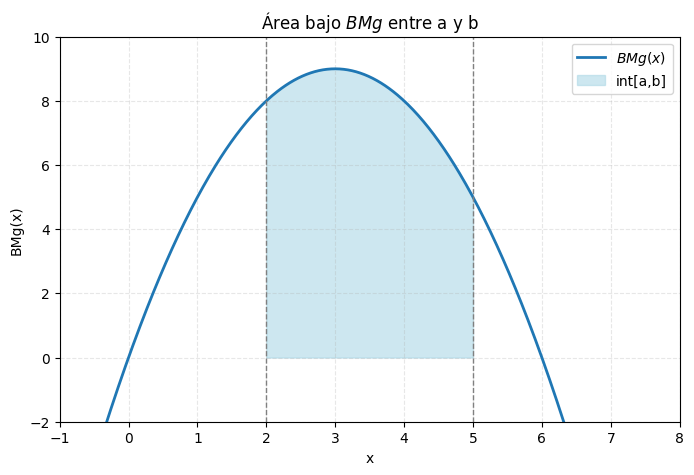

In [25]:
x_full = np.linspace(-5, 10, 1000)
x_fill = np.linspace(2, 5, 1000)
plt.figure(figsize=(8,5))
plt.plot(x_full, BMg_func(x_full), label=r'$BMg(x)$', linewidth=2)
plt.fill_between(x_fill,
                 BMg_func(x_fill),
                 color='lightblue',
                 alpha=0.6,
                 label='int[a,b]')
plt.axvline(2, color='gray', linestyle='--', linewidth=1)
plt.axvline(5, color='gray', linestyle='--', linewidth=1)
plt.title('Área bajo $BMg$ entre a y b')
plt.xlabel('x')
plt.ylabel('BMg(x)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.ylim(-2, 10)
plt.xlim(-1, 8)
plt.show()


El área sombrada es el **beneficio total acumulado** entre 2 y 5 unidades.

Grafiquemos un poco más

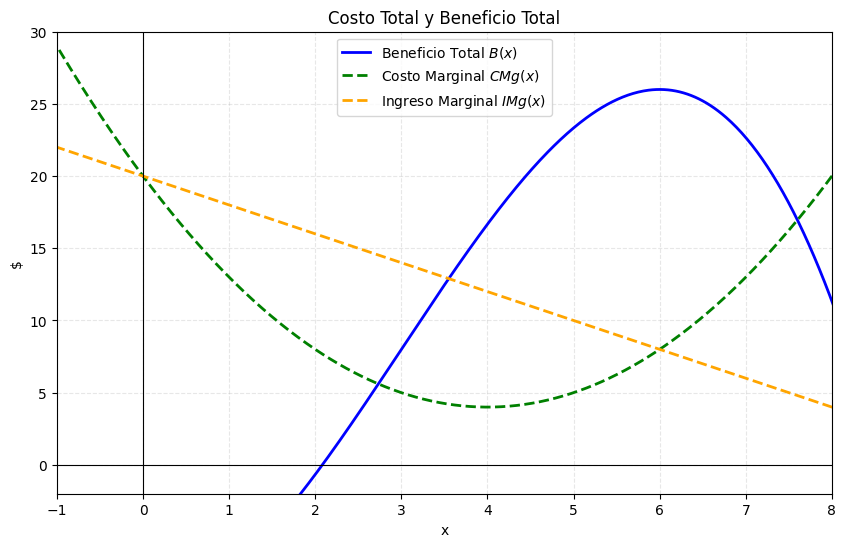

In [26]:
B_func = sp.lambdify(x, B, 'numpy')
CMg_func = sp.lambdify(x, CMg, 'numpy')
IMg_func = sp.lambdify(x, IMg, 'numpy')


plt.figure(figsize=(10, 6))

plt.plot(x_full, B_func(x_full), label='Beneficio Total $B(x)$', linewidth=2, color='blue')
plt.plot(x_full, CMg_func(x_full), label='Costo Marginal $CMg(x)$', linewidth=2, color='green', linestyle='--')
plt.plot(x_full, IMg_func(x_full), label='Ingreso Marginal $IMg(x)$', linewidth=2, color='orange', linestyle='--')

plt.title('Costo Total y Beneficio Total')
plt.xlabel('x')
plt.ylabel('$')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)

plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.ylim(-2,30)
plt.xlim(-1,8)
plt.show()


- La **cantidad óptima de producción** se alcanza cuando **IMg(x) = CMg(x)**

- Producir más allá de este punto reduciría el beneficio total, ya que los costos adicionales superan los ingresos adicionales.

- La empresa se enfrenta a una **curva de demanda con pendiente negativa**: para vender más unidades, la empresa debe bajar los precios.

- **Beneficios crecientes** inicialmente (cuando IMg > CMg).

- **Beneficios decrecientes** más allá del óptimo (cuando CMg > IMg).

- **Zona de beneficios**: Donde B(x) > 0 (la empresa debería operar en este rango)

- **Punto de cierre**: Donde B(x) = 0


#DataFrames
La base de datos que vamos a usar se creó con registros de ausentismo laboral desde julio de 2007 hasta julio de 2010 en una empresa de mensajería en Brasil.

In [27]:
df = pd.read_csv('Dataset integradora 1.csv',delimiter=';', decimal=',')
#primeras filas
df.head()


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [28]:
#información de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ID                               740 non-null    int64 
 1   Reason for absence               740 non-null    int64 
 2   Month of absence                 740 non-null    int64 
 3   Day of the week                  740 non-null    int64 
 4   Seasons                          740 non-null    int64 
 5   Transportation expense           740 non-null    int64 
 6   Distance from Residence to Work  740 non-null    int64 
 7   Service time                     740 non-null    int64 
 8   Age                              740 non-null    int64 
 9   Work load Average/day            740 non-null    object
 10  Hit target                       740 non-null    int64 
 11  Disciplinary failure             740 non-null    int64 
 12  Education                        740

In [29]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [30]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

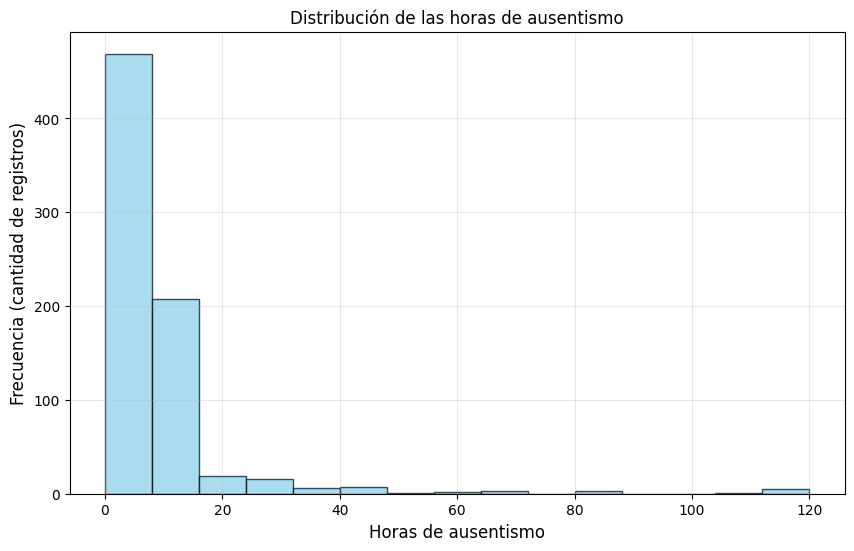

In [31]:
#graficamos el tiempo de ausentismo
plt.figure(figsize=(10, 6))

plt.hist(df['Absenteeism time in hours'], bins=15, edgecolor='black',
         alpha=0.7, color='skyblue')
plt.title('Distribución de las horas de ausentismo')
plt.xlabel('Horas de ausentismo', fontsize=12)
plt.ylabel('Frecuencia (cantidad de registros)', fontsize=12)
plt.grid(True, alpha=0.3)

Fíjense que en la parte de la razón del ausentismo tenemos códigos, no la razón escrita. Vamos a armar un diccionario para referir a estos códigos. Vamos a ver cuántos códigos hay y en base a eso lo armamos.

In [32]:
df['Reason for absence'].max()

np.int64(28)

In [33]:
reason_mapping = {
    0: 'COVID-19', 1: 'Infectious diseases', 2: 'Pick child from school', 3: 'Blood diseases', 4: 'Endocrine diseases', 5: 'Mental disorders',
    6: 'Nervous system', 7: 'Eye diseases', 8: 'Ear diseases', 9: 'Circulatory system', 10: 'Respiratory system',
    11: 'Digestive system', 12: 'Skin diseases', 13: 'Musculoskeletal', 14: 'Urinary', 15: 'Pregnancy', 16: 'Perinatal period', 17: 'Congenital anomalies',
    18: 'Symptoms not classified', 19: 'Injuries', 20: 'External causes', 21: 'Health services', 22: 'Follow-up examination',
    23: 'Medical consultation', 24: 'Blood donation', 25: 'Laboratory examination', 26: 'Unjustified absence', 27: 'Menstrual cramps', 28: 'Physiotherapy'
}

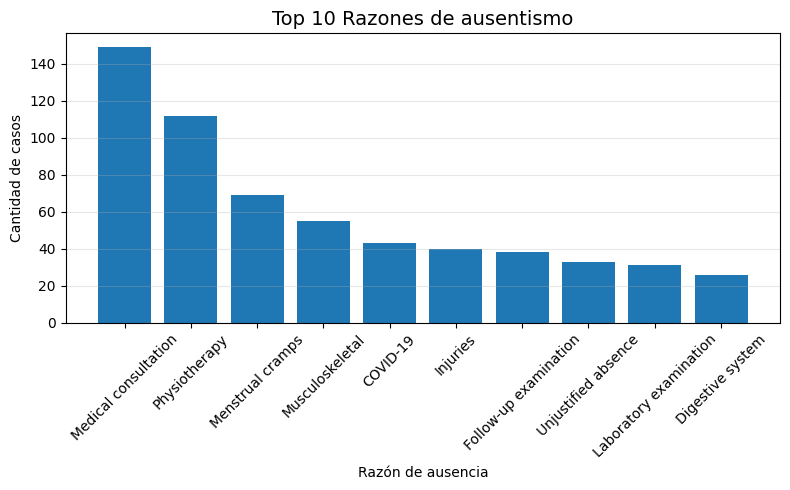

In [34]:
#graficamos el ausentismo según motivo
plt.figure(figsize=(8, 5))
reason_counts = df['Reason for absence'].value_counts().head(10)
reason_names = [reason_mapping.get(code, f'Reason {code}') for code in reason_counts.index]
plt.bar(reason_names, reason_counts.values)
plt.title('Top 10 Razones de ausentismo', fontsize=14)
plt.xlabel('Razón de ausencia')
plt.ylabel('Cantidad de casos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, alpha=0.3, axis='y')
plt.show()

Text(0, 0.5, 'Cantidad de horas')

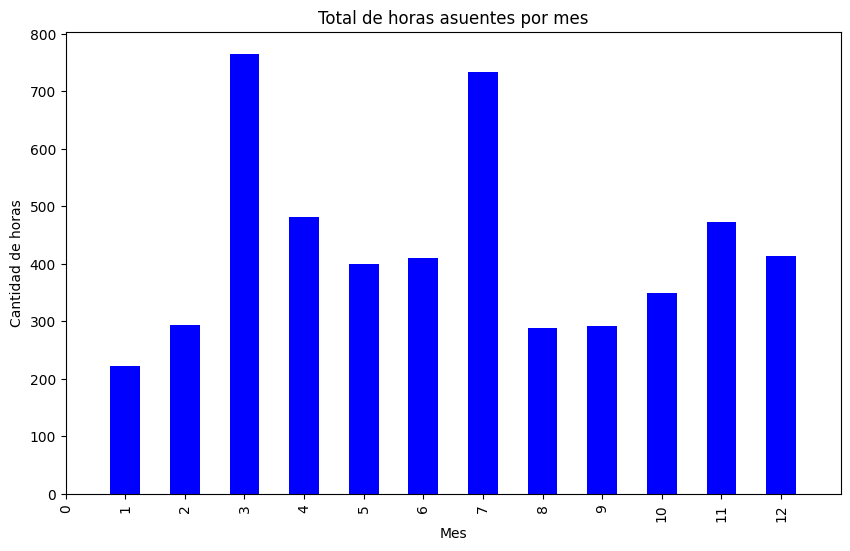

In [35]:
#graficamos el ausentismo por mes
plt.figure(figsize=(10,6))
month_absent = df.groupby('Month of absence')['Absenteeism time in hours'].sum()
month_absent.plot(kind='bar', color='blue')
plt.title('Total de horas asuentes por mes')
plt.xlabel('Mes')
plt.xlim(0,13)
plt.ylabel('Cantidad de horas')

Tarea: Hacer el gráfico de barras agrupado por día de la semana.

Text(0, 0.5, 'Cantidad de horas registradas')

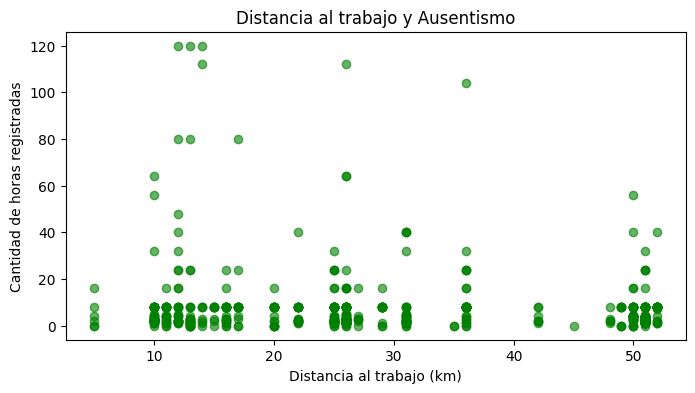

In [36]:
#graficamos el ausentismo contra la distancia al trabajo
plt.figure(figsize=(8,4))
plt.scatter(df['Distance from Residence to Work'], df['Absenteeism time in hours'], alpha=0.6,color='green')
plt.title('Distancia al trabajo y Ausentismo')
plt.xlabel('Distancia al trabajo (km)')
plt.ylabel('Cantidad de horas registradas')

Cada punto representa un registrode ausencia.

- NO hay un patrón de correlación claro.

Esto sugiere que la distancia al trabajo no es un predictor fiable del ausentismo.

In [37]:
#Análisis por estaciones
print("\nEstacionalidad:")
estacionalidad = df.groupby('Seasons')['Absenteeism time in hours'].agg(['mean', 'sum', 'count'])
print(estacionalidad)


Estacionalidad:
             mean   sum  count
Seasons                       
1        7.300000  1241    170
2        6.000000  1152    192
3        8.153005  1492    183
4        6.353846  1239    195


- ¿Cuál fue la estación con mayor registros de ausentismo?
- ¿Cuál fue la estación con mayor cantidad de horas de ausentismo?
- ¿Cuál fue la estación con mayor promedio de horas de ausentismo?

In [38]:
# Social drinker/smoker
print("\nAusentismo según hábitos sociales:")
print("Social Drinkers:")
print(df.groupby('Social drinker')['Absenteeism time in hours'].mean())
print("\nSocial Smokers:")
print(df.groupby('Social smoker')['Absenteeism time in hours'].mean())


Ausentismo según hábitos sociales:
Social Drinkers:
Social drinker
0    5.931250
1    7.680952
Name: Absenteeism time in hours, dtype: float64

Social Smokers:
Social smoker
0    6.957726
1    6.500000
Name: Absenteeism time in hours, dtype: float64


In [39]:
#Casos de mucho ausentismo
mucho_ausentismo = df[df['Absenteeism time in hours'] > 8]
print(f"Registros con >8 horas ausentes: {len(mucho_ausentismo)}")

Registros con >8 horas ausentes: 63


In [40]:
#delatamos el ID de los que registraron mucho tiempo ausentes
mas_ausentes = df.nlargest(5, 'Absenteeism time in hours')[['ID', 'Absenteeism time in hours', 'Reason for absence']]
#añadimos la descripción de la razón
mas_ausentes['Reason Description'] = mas_ausentes['Reason for absence'].map(reason_mapping)
print("\nTop 5 registros con más horas ausentes:")
mas_ausentes


Top 5 registros con más horas ausentes:


,ID,Absenteeism time in hours,Reason for absence,Reason Description
323,14,120,11,Digestive system
420,36,120,13,Musculoskeletal
729,9,120,6,Nervous system
471,28,112,9,Circulatory system
622,9,112,12,Skin diseases


Fuentes:

https://archive.ics.uci.edu/dataset/445/absenteeism+at+work

"Notas de Análisis Matemático I Teórico Prácticas." María José Bianco, Andrea Gache, Roberto A. García, Gustavo Zorzoli.	2022. Primera edición. Editorial	Facutad de Ciencias Económicas, Universidad de Buenos Aires

Hilpisch, Y. (2018). Python for Finance: Mastering Data-Driven Finance (2nd ed.). O’Reilly Media.